In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

market_df = pd.read_csv('train_replenishment.csv')
market_df

,Unnamed: 0,date,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
0,0,2018-06-30,11260680,120456,0.625000,4.2484,306.0,116.0,10.0,0.0
1,1,2018-06-30,4422878,120439,0.608695,4.3027,598.0,111.0,3.0,5.0
2,2,2018-06-30,4429950,121410,1.000000,3.9568,879.0,134.0,32.0,0.0
3,3,2018-06-30,4430741,118147,1.000000,4.2335,394.0,121.0,0.0,0.0
4,4,2018-06-30,4431882,120456,1.000000,4.1695,236.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387020,387020,2018-09-07,9978653,121074,1.000000,4.4562,708.0,133.0,0.0,16.0
387021,387021,2018-09-07,9984121,117810,1.000000,4.1921,781.0,127.0,20.0,0.0
387022,387022,2018-09-07,9984781,117746,1.000000,4.2227,229.0,125.0,20.0,0.0
387023,387023,2018-09-07,9989789,120438,1.000000,4.2155,283.0,116.0,0.0,3.0


In [2]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387025 entries, 0 to 387024
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           387025 non-null  int64  
 1   date                 387025 non-null  object 
 2   product_id           387025 non-null  int64  
 3   cat_id               387025 non-null  int64  
 4   live_rate            387025 non-null  float64
 5   score_mean           372145 non-null  float64
 6   score_count          387025 non-null  float64
 7   price_group          387025 non-null  float64
 8   discount_percentage  387025 non-null  float64
 9   sold_count           387025 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 29.5+ MB


(array([4.10000e+01, 1.07000e+02, 4.50000e+02, 2.72000e+02, 1.13000e+02,
        3.64100e+03, 1.15320e+04, 1.12833e+05, 2.33591e+05, 9.56500e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

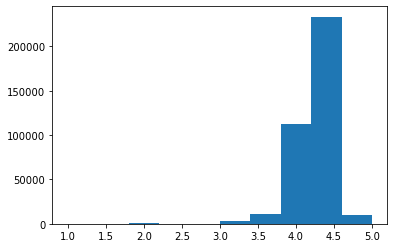

In [3]:
plt.hist(market_df['score_mean'])

(array([3.66069e+05, 1.40540e+04, 4.07700e+03, 1.23200e+03, 9.98000e+02,
        2.65000e+02, 1.36000e+02, 1.01000e+02, 2.50000e+01, 6.80000e+01]),
 array([    0. ,  1432.3,  2864.6,  4296.9,  5729.2,  7161.5,  8593.8,
        10026.1, 11458.4, 12890.7, 14323. ]),
 <BarContainer object of 10 artists>)

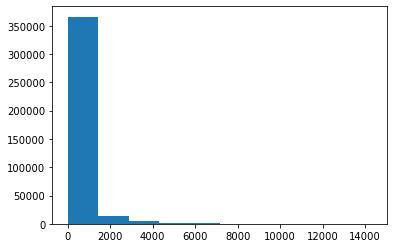

In [4]:
plt.hist(market_df['score_count'])

In [5]:
market_df['score_mean'] = market_df['score_mean'].fillna(0)

In [31]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

encoder = OrdinalEncoder()
market_df['date'] = encoder.fit_transform(market_df[['date']])
market_df

,Unnamed: 0,date,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
0,0,0.0,11260680,120456,0.625000,4.2484,306.0,116.0,10.0,0.0
1,1,0.0,4422878,120439,0.608695,4.3027,598.0,111.0,3.0,5.0
2,2,0.0,4429950,121410,1.000000,3.9568,879.0,134.0,32.0,0.0
3,3,0.0,4430741,118147,1.000000,4.2335,394.0,121.0,0.0,0.0
4,4,0.0,4431882,120456,1.000000,4.1695,236.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387020,387020,69.0,9978653,121074,1.000000,4.4562,708.0,133.0,0.0,16.0
387021,387021,69.0,9984121,117810,1.000000,4.1921,781.0,127.0,20.0,0.0
387022,387022,69.0,9984781,117746,1.000000,4.2227,229.0,125.0,20.0,0.0
387023,387023,69.0,9989789,120438,1.000000,4.2155,283.0,116.0,0.0,3.0


In [32]:
data = market_df.drop(columns='sold_count')
target = market_df['sold_count']

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

model = make_pipeline(StandardScaler(), LinearRegression())

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target , test_size=0.3 , random_state=85)

In [35]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [36]:
prediction = model.predict(X_test)

In [42]:
from sklearn import metrics
import math

MSE = metrics.mean_squared_error(y_test,prediction)
math.sqrt(MSE)

12.585155963340046